In [20]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

import trompy as tp

In [21]:
folder = "D:\\Test Data\\fostrap\\"
mouse = "FT118"
cells = "trap"
subfolder = "\\nutil\\Reports\\{}_{}_RefAtlasRegions\\{}_{}_RefAtlasRegions.csv".format(mouse, cells, mouse, cells)

In [22]:
with open(folder+"fostrap_metafile.csv", "r") as f:
    r = csv.writer(f)
    header = f.readlines()[0]
    f.seek(0)
    metafilerows = f.readlines()[1:]

mouserows = []
for i in metafilerows:
    mouserows.append(i.split(','))

In [23]:
def get_cell_data(mouse, cells, folder="D:\\Test Data\\fostrap\\"):
    cells = "trap"
    subfolder = "\\nutil\\Reports\\{}_{}_RefAtlasRegions\\{}_{}_RefAtlasRegions.csv".format(mouse, cells, mouse, cells)

    with open(folder+mouse+subfolder, "r") as f:
        r = csv.writer(f)
        header = f.readlines()[0]
        f.seek(0)
        filerows = f.readlines()[1:]

    tablerows = []
    for i in filerows:
        tablerows.append(i.split(';'))

    nutil_data = {}
    for row in tablerows:
        key=row[1]
        object_count=row[5]
        nutil_data[key]=[int(object_count)]
    
    df = pd.DataFrame.from_dict(nutil_data)

    return df
    


In [55]:
cols = ["mouse", "diet", "sex", "solution1", "solution2", "celltype"]
df = pd.DataFrame()

# for TRAP cells
cells="trap"
for row in mouserows:
    df_id = pd.DataFrame([[row[0], row[1], row[2], row[3], row[4], cells]], columns=cols)
    try:
        df_cells = get_cell_data(row[0], cells)
        print("Yay for {}".format(row[0]))
    except FileNotFoundError:
        print("Data for {} do not seem to be available yet.".format(row[0]))
        continue
    
    df_mouse = pd.concat([df_id, df_cells], axis=1)
    df_mouse.set_index("mouse", drop=True, inplace=True)
    
    if not df.empty:
        df = pd.concat([df, df_mouse], axis=0)
    else:
        df  = df_mouse




Yay for FT106
Yay for FT112
Yay for FT118
Yay for FT120
Yay for FT126
Yay for FT136
Yay for FT127
Yay for FT133


In [56]:
df["Parasubthalamic nucleus"]

mouse
FT106     78
FT112     47
FT118     14
FT120     12
FT126     88
FT136     64
FT127    114
FT133    102
Name: Parasubthalamic nucleus, dtype: int64

In [57]:
# for searching for column names

substring="tegmental"
for i in df.columns:
    if substring in i:
        print(i)


df.loc[:,['thal' in i for i in df.columns]]

Ventral tegmental area
Ventral tegmental nucleus
Anterior tegmental nucleus
Dorsal tegmental nucleus
Lateral tegmental nucleus
Posterodorsal tegmental nucleus
Laterodorsal tegmental nucleus
pallidotegmental fascicle
doral tegmental decussation
ventral tegmental decussation
central tegmental bundle
mammillotegmental tract
dorsal tegmental tract


,Ventral group of the dorsal thalamus,Ventral anterior-lateral complex of the thalamus,Ventral medial nucleus of the thalamus,Ventral posterior complex of the thalamus,Ventral posterolateral nucleus of the thalamus,"Ventral posterolateral nucleus of the thalamus, parvicellular part",Ventral posteromedial nucleus of the thalamus,"Ventral posteromedial nucleus of the thalamus, parvicellular part",Posterior triangular thalamic nucleus,"Geniculate group, dorsal thalamus",...,propriohypothalamic pathways,"propriohypothalamic pathways, dorsal","propriohypothalamic pathways, lateral","propriohypothalamic pathways, medial","propriohypothalamic pathways, ventral",periventricular bundle of the hypothalamus,mammillothalamic tract,dorsal thalamus related,periventricular bundle of the thalamus,epithalamus related
mouse,,,,,,,,,,,,,,,,,,,,,
FT106,0,102,155,0,59,19,123,87,29,0,...,0,0,0,0,0,0,49,0,0,0
FT112,0,8,24,0,19,1,32,3,19,0,...,0,0,0,0,0,0,20,0,0,0
FT118,0,49,39,0,30,0,78,14,57,0,...,0,0,0,0,0,0,28,0,0,0
FT120,0,71,59,0,26,6,92,16,27,0,...,0,0,0,0,0,0,16,0,0,0
FT126,0,29,61,0,42,4,181,28,64,0,...,0,0,0,0,0,0,23,0,0,0
FT136,0,14,48,0,10,0,46,7,23,0,...,0,0,0,0,0,0,18,0,0,0
FT127,0,48,81,0,35,18,138,58,55,0,...,0,0,0,0,0,0,12,0,0,0
FT133,0,22,29,0,12,3,67,2,7,0,...,0,0,0,0,0,0,11,0,0,0


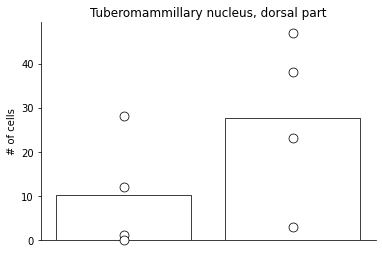

In [103]:
import trompy as tp
import matplotlib.pyplot as plt

def single_region_fig(df, key):
    data_nr = df[df["diet"] == "nr"][key]
    data_pr = df[df["diet"] == "pr"][key]

    f, ax = plt.subplots()
    _ = tp.barscatter([data_nr, data_pr], ax=ax)
    ax.set_title(key)
    ax.set_ylabel("# of cells")

single_region_fig(df, "Tuberomammillary nucleus, dorsal part")
        


In [61]:
# for each area
from pandas.api.types import is_numeric_dtype
import numpy as np

def normalize_df(df):

    normalized_df = df.copy()
    for column in df.columns:
        if is_numeric_dtype(df[column]):
            if np.sum(df[column]) == 0:
                normalized_df.drop([column], axis=1, inplace=True)
                continue
            normalized_df[column] = (df[column] - df[column].mean()) /df[column].std()
            

    return normalized_df

normalized_df = normalize_df(df)

# normalized_df=(df-df.mean())/df.std()



In [62]:
normalized_df

,diet,sex,solution1,solution2,celltype,Clear Label,root,"Frontal pole, layer 6a","Frontal pole, layer 6b","Primary motor area, Layer 1",...,mammillary peduncle,stria medullaris,fasciculus retroflexus,habenular commissure,lateral ventricle,subependymal zone,choroid plexus,third ventricle,cerebral aqueduct,lateral recess
mouse,,,,,,,,,,,,,,,,,,,,,
FT106,nr,male,casein,casein,trap,1.491569,-0.306577,-0.353553,-0.353553,-0.475593,...,-0.991031,-1.052986,0.214099,0.304778,1.455396,1.300070,1.691991,0.818912,-0.619839,-0.353553
FT112,pr,male,casein,water,trap,-0.816780,0.062995,-0.353553,-0.353553,-0.250460,...,1.027069,-0.491394,0.099913,0.711150,-0.506803,-0.737153,0.595330,-0.236975,-0.619839,-0.353553
FT118,nr,male,casein,casein,trap,0.861965,1.507688,-0.353553,-0.353553,-0.610672,...,-0.414431,0.463314,0.556656,-0.778878,0.568860,0.120625,0.156666,2.126773,2.008455,-0.353553
FT120,pr,male,casein,casein,trap,1.207290,1.507688,-0.353553,-0.353553,-0.565646,...,0.594619,-1.446101,1.241772,-0.914335,1.443576,0.120625,0.877329,-0.116987,1.062269,-0.353553
FT126,pr,male,casein,casein,trap,-0.687507,-0.956129,-0.353553,-0.353553,2.406105,...,-0.846881,1.698818,-1.498690,1.523892,-0.625008,1.621737,-1.002661,-0.692926,-0.602318,-0.353553
FT136,pr,male,casein,water,trap,-0.557637,-0.832938,-0.353553,-0.353553,0.132265,...,-0.702731,0.238677,1.127586,-0.914335,-0.802315,-0.522709,-0.626663,-0.812913,-0.584796,-0.353553
FT127,nr,male,casein,water,trap,-0.732394,-0.127391,2.474874,2.474874,-0.250460,...,-0.414431,-0.042119,-0.699389,0.982064,-0.707751,-0.844375,-0.563997,-0.488948,-0.041615,2.474874
FT133,nr,male,casein,water,trap,-0.766507,-0.855336,-0.353553,-0.353553,-0.385540,...,1.747819,0.631792,-1.041946,-0.914335,-0.825956,-1.058820,-1.127994,-0.596936,-0.602318,-0.353553


In [89]:
def find_biggest_diffs(normalized_df):

    df_diff = pd.DataFrame(columns=["Difference score"])
    for column in normalized_df.columns:
        if is_numeric_dtype(df[column]):
            data_nr = normalized_df[normalized_df["diet"] == "nr"][column]
            data_pr = normalized_df[normalized_df["diet"] == "pr"][column]

            df_new = pd.DataFrame(data=[data_pr.mean() - data_nr.mean()], columns=["Difference score"], index=[column])
            df_diff = pd.concat([df_diff, df_new])

    return df_diff

df_diff = find_biggest_diffs(normalized_df)


In [80]:
for row in df_diff.sort_values(by="Difference score"):
    print(row)

Difference score


In [90]:
sorted_df_diff = df_diff.sort_values(by="Difference score")

sorted_df_diff.to_csv(folder+"difference.csv")

                                                    Difference score
Primary somatosensory area, nose, layer 6b                 -1.633858
ventral hippocampal commissure                             -1.465455
Parataenial nucleus                                        -1.438316
Gustatory areas, layer 6b                                  -1.403122
nigrostriatal tract                                        -1.379252
...                                                              ...
Laterointermediate area, layer 6b                           1.080123
Anterior area, layer 6b                                     1.097581
Postsubiculum                                               1.098536
brachium of the superior colliculus                         1.209885
Cortical amygdalar area, posterior part, medial...          1.398731

[573 rows x 1 columns]
